In [28]:
import pandas as pd
import plotly.express as px

from scipy import stats
import statsmodels.stats.multicomp as mc

In [60]:
labels={
    'sin':'Sin OpenMP',
    'con':'Con OpenMP',
    'numpy':'Numpy',
    'Reficiente':'R-eficiente',
    'R':'Software-R',
    'experiment':'Tamaño de la matriz',
    'Valor':'Tiempo en segundos'
}

In [77]:
df = pd.read_csv('experimento.csv', sep = ',', decimal = '.', header = 0, encoding = 'utf-8')
df = df.melt(id_vars=['experiment'], 
             value_vars=['sin', 'con', 'numpy', 'Reficiente', 'R'],
             var_name='Variable', 
             value_name='Valor')
df.head()

,experiment,Variable,Valor
0,100,sin,0.004972
1,100,sin,0.004572
2,100,sin,0.005439
3,100,sin,0.004857
4,100,sin,0.004686


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   experiment  250 non-null    int64  
 1   Variable    250 non-null    object 
 2   Valor       250 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.0+ KB


In [79]:
df2 = df.copy()
df2 = df2.groupby(['experiment','Variable'])['Valor'].mean().reset_index()
df2.head()

,experiment,Variable,Valor
0,100,R,0.255425
1,100,Reficiente,0.002892
2,100,con,0.003534
3,100,numpy,0.000974
4,100,sin,0.004813


In [80]:
fig = px.line(df2, x="experiment", y="Valor", color='Variable', markers=True, title='', labels=labels)
fig.show()

In [81]:
fig = px.box(df, x="experiment", y="Valor", color='Variable', labels=labels)
fig.show()

In [53]:
df = pd.read_csv('experimento.csv', sep = ',', decimal = '.', header = 0, encoding = 'utf-8')
df = df.melt(id_vars=['experiment'], 
             value_vars=['sin', 'con', 'numpy'],
             var_name='Variable', 
             value_name='Valor')
df.head()

,experiment,Variable,Valor
0,100,sin,0.004972
1,100,sin,0.004572
2,100,sin,0.005439
3,100,sin,0.004857
4,100,sin,0.004686


In [54]:
comp = mc.MultiComparison(df['Valor'], df['experiment'])
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
100,200,0.0248,0.9755,-0.09,0.1395,False
100,300,0.0798,0.3108,-0.0349,0.1946,False
100,400,0.2708,0.0,0.1561,0.3856,True
100,500,0.4302,0.0,0.3154,0.5449,True
200,300,0.0551,0.6761,-0.0597,0.1698,False
200,400,0.2461,0.0,0.1313,0.3608,True
200,500,0.4054,0.0,0.2906,0.5202,True
300,400,0.191,0.0001,0.0762,0.3058,True
300,500,0.3503,0.0,0.2356,0.4651,True
400,500,0.1593,0.0017,0.0446,0.2741,True


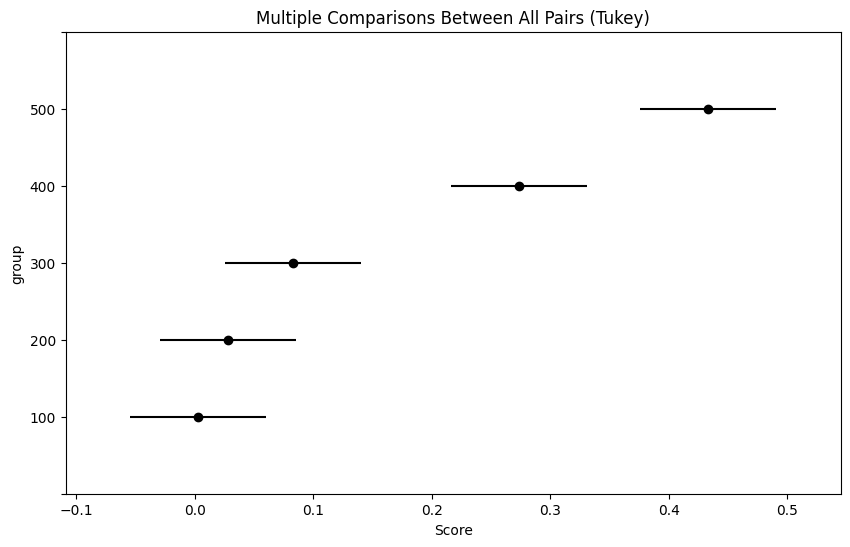

In [55]:
post_hoc_res.plot_simultaneous(ylabel='group', xlabel='Score');